Neural Network Model

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("sales_data2.csv") 

target = "Sales_Amount"
X = df.drop(columns=target)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical = X.select_dtypes(include="object").columns
numerical = X.select_dtypes(include=["int64", "float64"]).columns

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
    ("num", StandardScaler(), numerical)
])

# model definition
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", mlp)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Neural network evaluation")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

results_df = pd.DataFrame({
    "Real value": y_test.values,
    "Predicted value": y_pred
})
print("\nPredictions:\n")
print(results_df.head(10))


Neural network evaluation
MAE: 2362.07
RMSE: 2784.47
R²: 0.0139

Predictions:

   Real value  Predicted value
0      823.51      5473.951664
1     7895.13      5627.830590
2     3617.67      4667.395131
3     1710.73      5582.870755
4     7813.12      5462.756793
5     4637.40      4552.278120
6     4036.36      5128.387548
7     9813.81      5674.816769
8     3634.59      4851.318162
9     8564.24      4501.225724


c:\Users\Uzivatel\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


nisu dobri podaci!
pokušaj #2:

🔍 Neural Network Evaluation:
MAE: 2597.54
RMSE: 3091.56
R²: -0.2156

Predictions:

   Real value  Predicted value
0      823.51      6632.712132
1     7895.13      5052.281606
2     3617.67      4170.887433
3     1710.73      5927.251285
4     7813.12      4181.827525
5     4637.40      3633.178335
6     4036.36      6240.166983
7     9813.81      5193.631009
8     3634.59      3601.247280
9     8564.24      3925.147455


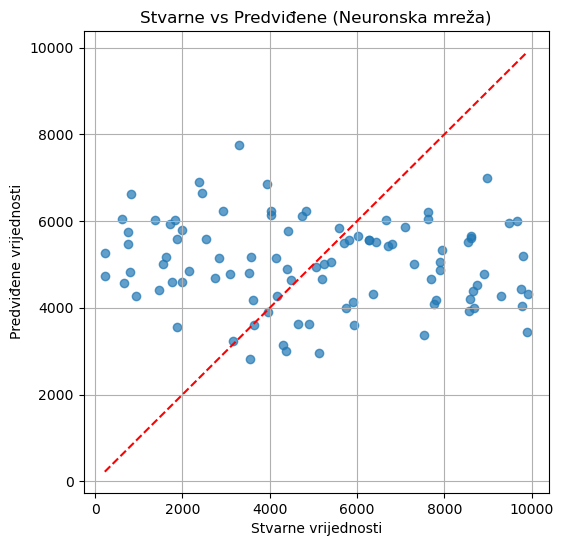

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("sales_data2.csv")  

X = df.drop("Sales_Amount", axis=1)  
y = df["Sales_Amount"]

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# model definition and training
mlp = MLPRegressor(hidden_layer_sizes=(100, 50),  # više slojeva i neurona
                   activation='relu',
                   solver='adam',
                   alpha=0.0001,
                   learning_rate='adaptive',
                   max_iter=1000,
                   early_stopping=True,
                   random_state=42)

mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("🔍 Neural Network Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

comparison_df = pd.DataFrame({
    "Real value": y_test.values[:10],
    "Predicted value": y_pred[:10]
})
print("\nPredictions:\n")
print(comparison_df)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Stvarne vrijednosti")
plt.ylabel("Predviđene vrijednosti")
plt.title("Stvarne vs Predviđene (Neuronska mreža)")
plt.grid()
plt.show()


MAE: 5039.39
RMSE: 7608.75
R²: -6.3630


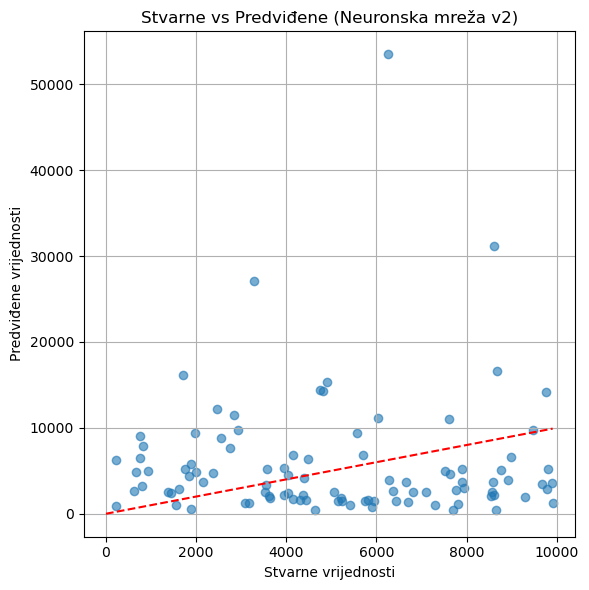

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("sales_data2.csv")  

X = df.drop(columns=["Sales_Amount"])
y = np.log1p(df["Sales_Amount"])  # log-transformacija cilja

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  transformator
categorical = X.select_dtypes(include='object').columns
numerical = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical),
    ("num", StandardScaler(), numerical)
])

model = MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu', max_iter=1000, random_state=42)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", model)
])

pipeline.fit(X_train, y_train)

y_pred_log = pipeline.predict(X_test)
y_pred = np.expm1(y_pred_log)  # obrni log-transformaciju
y_test_real = np.expm1(y_test)

mae = mean_absolute_error(y_test_real, y_pred)
rmse = mean_squared_error(y_test_real, y_pred, squared=False)
r2 = r2_score(y_test_real, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

plt.figure(figsize=(6,6))
plt.scatter(y_test_real, y_pred, alpha=0.6)
plt.plot([0, max(y_test_real)], [0, max(y_test_real)], color='red', linestyle='--')
plt.xlabel("Stvarne vrijednosti")
plt.ylabel("Predviđene vrijednosti")
plt.title("Stvarne vs Predviđene (Neuronska mreža v2)")
plt.grid(True)
plt.tight_layout()
plt.show()


Podaci pokazuju da model nije dobar. 
U nastavku pokušaj s TensorFlowom:

In [ ]:
!pip install tensorflow-cpu --no-cache-dir

^C


   ---------------------------------------- 0.0/375.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/375.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/375.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/375.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/375.9 MB 326.8 kB/s eta 0:19:11
   ---------------------------------------- 0.0/375.9 MB 326.8 kB/s eta 0:19:11
   ---------------------------------------- 0.1/375.9 MB 353.1 kB/s eta 0:17:45
   ---------------------------------------- 0.1/375.9 MB 353.1 kB/s eta 0:17:45
   ---------------------------------------- 0.1/375.9 MB 353.1 kB/s eta 0:17:45
   ---------------------------------------- 0.1/375.9 MB 267.9 kB/s eta 0:23:23
   ---------------------------------------- 0.1/375.9 MB 327.9 kB/s eta 0:19:07
   ---------------------------------------- 0.2/375.9 MB 327.3 kB/s eta 0:19:09
   ---------------------------------------- 0.2/375.9 MB 327.3 kB/s eta 0:19

In [7]:
import tensorflow as tf

print("TensorFlow verzija:", tf.__version__)

hello = tf.constant("Hello, TensorFlow!")
print(hello)


TensorFlow verzija: 2.19.0
tf.Tensor(b'Hello, TensorFlow!', shape=(), dtype=string)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv("sales_data2.csv")  

X = df.drop(columns=["Sales_Amount"])
y = df["Sales_Amount"]                

# Dummy encoding 
X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# MODEL 
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1)) 

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

y_pred = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

results_df = pd.DataFrame({'Real value': y_test.values, 'Predicted value': y_pred})
print(results_df.head(10))


c:\Users\Uzivatel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
MAE: 2630.82
RMSE: 3153.28
R²: -0.2646
   Real value  Predicted value
0      823.51      6553.359863
1     7895.13      3675.887207
2     3617.67      3529.727783
3     1710.73      5068.630371
4     7813.12      6321.099121
5     4637.40      3449.698242
6     4036.36      6332.596191
7     9813.81      3742.245361
8     3634.59      3725.088867
9     8564.24      2399.763916


In [9]:
#improving the code:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv("sales_data2.csv")  

X = df.drop(columns=["Sales_Amount"])
y = df["Sales_Amount"]                

# Dummy encoding 
X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# improved model with more layers and neurons 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))  # veći broj neurona
model.add(tf.keras.layers.Dense(64, activation='relu'))  # new layer
model.add(tf.keras.layers.Dense(32, activation='relu'))  # another layer
model.add(tf.keras.layers.Dense(1))  # output layer

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=300, batch_size=16, verbose=1, validation_split=0.2)

y_pred = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

results_df = pd.DataFrame({'Real value': y_test.values, 'Predicted value': y_pred})
print(results_df.head(10))


c:\Users\Uzivatel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 34814244.0000 - val_loss: 30434254.0000
Epoch 2/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 35249880.0000 - val_loss: 30340066.0000
Epoch 3/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 34364716.0000 - val_loss: 30072934.0000
Epoch 4/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 30453574.0000 - val_loss: 29420338.0000
Epoch 5/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 31754984.0000 - val_loss: 28073032.0000
Epoch 6/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 32112032.0000 - val_loss: 25711144.0000
Epoch 7/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 26659680.0000 - val_loss: 22167476.0000
Epoch 8/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23493418.0000 - val_loss: 17623996.0000
Epoch 9/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 16510869.0000 - val_loss: 13255309.0000
Epoch 10/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10552866.0000 - val_loss: 10555359.0000
Ep

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

df = pd.read_csv('sales_data2.csv') 

X = df.drop('Sales_Amount', axis=1)  
y = df['Sales_Amount']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nNeural Network Evaluation")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

comparison = pd.DataFrame({'Real value': y_test.values[:10], 'Predicted value': y_pred[:10].flatten()})
print("\nPredictions:\n")
print(comparison)


Epoch 1/200


c:\Users\Uzivatel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - loss: 34850380.0000 - val_loss: 30453776.0000
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 34764940.0000 - val_loss: 30444478.0000
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 33027116.0000 - val_loss: 30432820.0000
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 33289538.0000 - val_loss: 30417770.0000
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 34452688.0000 - val_loss: 30398540.0000
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 34236000.0000 - val_loss: 30374938.0000
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 32670740.0000 - val_loss: 30345878.0000
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 31917572.0000 - val_loss: 30311122.0000
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 33774092.0000 - val_loss: 30268928.0000
Epoch 10/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 33290584.0000 - val_loss: 30219196.0000
Epoch 11/2

TensorFlow + Keras

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv("sales_data2.csv")  # zamijeni s pravim nazivom

df = pd.get_dummies(df, drop_first=True)

X = df.drop("Sales_Amount", axis=1)
y = df["Sales_Amount"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # regresija → 1 izlaz
])

model.compile(optimizer='adam', loss='mse')

# training with EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

predictions = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²:", round(r2, 4))

results = pd.DataFrame({
    "Real value": y_test.values[:10],
    "Predicted value": predictions[:10]
})
print("\nPredictions:\n")
print(results)


Epoch 1/150


c:\Users\Uzivatel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 33009708.0000 - val_loss: 30454360.0000
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 36156972.0000 - val_loss: 30438236.0000
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 33280936.0000 - val_loss: 30418606.0000
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 33291086.0000 - val_loss: 30393028.0000
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 33656656.0000 - val_loss: 30359782.0000
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 32715414.0000 - val_loss: 30316708.0000
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 33531194.0000 - val_loss: 30261858.0000
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 34356324.0000 - val_loss: 30191904.0000
Epoch 9/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 35063616.0000 - val_loss: 30104674.0000
Epoch 10/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 35711580.0000 - val_loss: 29996554.0000
Epoch 11/15

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 1. Učitavanje podataka
df = pd.read_csv("sales_data2.csv") 

# 2. Pretvaranje kategorijskih varijabli u numeričke
df = pd.get_dummies(df, drop_first=True)

# 3. Odvajanje značajki i ciljne varijable
X = df.drop("Sales_Amount", axis=1)
y = df["Sales_Amount"]

# 4. Skaliranje podataka
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Treniranje/test podaci
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Definicija modela
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # regresija → 1 izlaz
])

model.compile(optimizer='adam', loss='mse')

# 7. Treniranje modela s EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# 8. Predikcija i evaluacija
predictions = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²:", round(r2, 4))

# 9. Primjeri predikcija
results = pd.DataFrame({
    "Real value": y_test.values[:10],
    "Predicted value": predictions[:10]
})
print("\nPredictions:\n")
print(results)


c:\Users\Uzivatel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 34145880.0000 - val_loss: 30451624.0000
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 34174780.0000 - val_loss: 30436064.0000
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 34076276.0000 - val_loss: 30415426.0000
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 34780696.0000 - val_loss: 30387752.0000
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 33871156.0000 - val_loss: 30350382.0000
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 33452538.0000 - val_loss: 30301128.0000
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 32649972.0000 - val_loss: 30237138.0000
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 33768080.0000 - val_loss: 30155560.0000
Epoch 9/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 34744724.0000 - val_loss: 30051092.0000
Epoch 10/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 32261584.0000 - val_loss: 29922902.0000

c:\Users\Uzivatel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
MAE: 2309.39
RMSE: 2749.17
R²: 0.0388

Predictions:

   Real value  Predicted value
0      823.51      5509.639160
1     7895.13      4977.692383
2     3617.67      5019.141113
3     1710.73      5069.587891
4     7813.12      5340.762695
5     4637.40      5619.668457
6     4036.36      4920.538086
7     9813.81      6390.494629
8     3634.59      3922.787354
9     8564.24      4729.270020


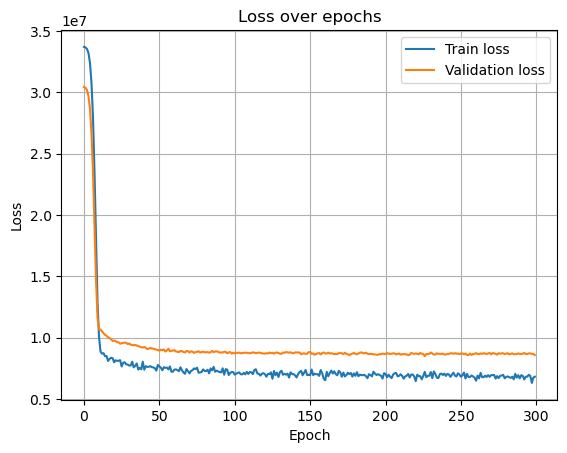

In [4]:
# training the model with top10 features
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

df = pd.read_csv("sales_data2.csv")
df['Price_to_Cost_Ratio'] = df['Unit_Price'] / df['Unit_Cost']
df['Revenue_per_Unit'] = df['Sales_Amount'] / df['Quantity_Sold']

top_features = ['Revenue_per_Unit', 'Quantity_Sold', 'Unit_Cost', 'Unit_Margin', 'Discount_Amount',
                'Total_Margin', 'Discount', 'Price_to_Cost_Ratio', 'Unit_Price', 'Weekday']  

X = df[top_features]
y = df['Sales_Amount'] 

# One-hot encoding
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model -> relu
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=300, batch_size=16, validation_split=0.2, verbose=0)

y_pred = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

results = pd.DataFrame({'Real value': y_test.values[:10], 'Predicted value': y_pred[:10]})
print("\nPredictions:\n")
print(results)

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over epochs")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# better code
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

df = pd.read_csv("sales_data2.csv")

df['Price_to_Cost_Ratio'] = df['Unit_Price'] / df['Unit_Cost']
df['Revenue_per_Unit'] = df['Sales_Amount'] / df['Quantity_Sold']

features = ['Revenue_per_Unit', 'Quantity_Sold', 'Unit_Cost', 'Unit_Margin', 'Discount_Amount',
            'Total_Margin', 'Discount', 'Price_to_Cost_Ratio', 'Unit_Price', 'Weekday']

X = df[features]
y = df['Sales_Amount']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    
    Dense(1, activation='linear')  # Izlazni sloj
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=150, batch_size=16, verbose=0)

y_pred = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

results = pd.DataFrame({'Real value': y_test.values[:10], 'Predicted value': y_pred[:10]})
print("\nPredictions:\n")
print(results)


c:\Users\Uzivatel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001F637A0B1A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step
MAE: 556.27
RMSE: 906.88
R²: 0.8954

Predictions:

   Real value  Predicted value
0      823.51      1113.664917
1     7895.13      8201.589844
2     3617.67      4030.999023
3     1710.73      18